# Knight's Walk

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

### Part 1 - Initialize the board

https://www.youtube.com/watch?v=RGQe8waGJ4w

We will store the chess board in a 2d- numpy array of integers. The size of the board is $(2n+1)$-by-$(2n+1)$, for a given integer $n$. This means the board extends from the center square by $n$ steps in all directions.

The first step is to initialize the board by filling it with the integers described in the video. Finish the implementation of the function definition in the cell below such that it returns this "spiral pattern" for any given input parameter $n$.

An example is given below: for the following input
```python
board = initialize_board(3)
```
the correct output is
```python
7×7 Array{Int64,2}:
 37  36  35  34  33  32  31
 38  17  16  15  14  13  30
 39  18   5   4   3  12  29
 40  19   6   1   2  11  28
 41  20   7   8   9  10  27
 42  21  22  23  24  25  26
 43  44  45  46  47  48  49
```

Test your function for various values of $n$ to make sure it is correct before you continue.

*Hints*:
- Note that since Python uses 0-based indexing, the center square of the array `board` is given by element `board[n,n]`.
- After the center $1$ has been placed, there are exactly $n$ "circles" of numbers of increasing radius. This is naturally implemented using a for-loop.
- In each "circle", there are 4 segments going up, left, down, and right. These are also naturally implemented using a sequence of 4 for-loops.

In [ ]:
def initialize_board(n):
    #ENTER CODE HERE
    return Board

### My solution to Part 1

I noticed that the board can be created by an anticlock-wise incremental spyral that turns to 4 different directions on a 90 degree angle.

Morover, each of these chunks has a lenght that follows a specific pattern. For example in a board of dimension 7x7:

spiral:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 ...

chunks:  1|2|3|4 5|6 7|8 9 10|11 12 13|14 15 16 17|18 19 20 21|22 23 24 25 26 ...

chunks_lenght:  1 1 1 2 2 3 3 4 4 5 5 6 6 6

chunks_directions: '+c', '-r', '-c', '+r', '+c', '-r', '-c', '+r' ...

So, basically the chunks lenght is a series from 1 to (dimension - 1), where every element is repeated twice, except the first and last number that is repeated thrice.

Every chunk of this series is expanding toward one out of 4 directions, with positive or negative index on the rows or on the columns. The pattern is repeating every 4 elements.

In [2]:
def initialize_board(n):    
    n = n-1 if n % 2 == 0 else n  # Making the board dimensions odd
    board = np.ones((n, n))       # Creating a board/matrix of ones
    r, c = board.shape            # Storing the n of rows and columns

    center_index = int((n + 1) / 2) - 1   # Finding the center cohordinate for x and y
    x, y = [center_index, center_index]  # Assigning the cohordinates    

    # Creating a list from 1 to n-1
    chunks = list(range(1, n))

    # Duplicating every element in the list
    duplicated_chunks = list(itertools.chain.from_iterable(itertools.repeat(x, 2) for x in chunks))

    # Repeating the last element once more
    duplicated_chunks.append( duplicated_chunks[-1] )
    
    # Defining the four basic moves
    moves = ['+c', '-r', '-c', '+r']

    # Making the moves list matching the chunks one
    moves = moves * (len(duplicated_chunks)// len(moves) + 1) 
    moves = moves[:len(duplicated_chunks)]

    chunk_counter = 0
    addendum = 1    # Incremental value to be added to each step

   
    for move in moves:
        if move == '+c':
            for quantity in range(duplicated_chunks[chunk_counter]):
                y += 1  # Updating the position before adding the value
                board[x, y] += addendum
                addendum += 1
            chunk_counter += 1  # Incrementing the chunk_counter outside the for cycle

        elif move == '-r':
            for quantity in range(duplicated_chunks[chunk_counter]):
                x -= 1
                board[x, y] += addendum
                addendum += 1
            chunk_counter += 1

        elif move == '-c':
            for quantity in range(duplicated_chunks[chunk_counter]):
                y -= 1
                board[x, y] += addendum
                addendum += 1
            chunk_counter += 1

        elif move == '+r':
            for quantity in range(duplicated_chunks[chunk_counter]):
                x += 1
                board[x, y] += addendum
                addendum += 1
            chunk_counter += 1

    return board

In [3]:
board = initialize_board(10)

print(board)

[[65. 64. 63. 62. 61. 60. 59. 58. 57.]
 [66. 37. 36. 35. 34. 33. 32. 31. 56.]
 [67. 38. 17. 16. 15. 14. 13. 30. 55.]
 [68. 39. 18.  5.  4.  3. 12. 29. 54.]
 [69. 40. 19.  6.  1.  2. 11. 28. 53.]
 [70. 41. 20.  7.  8.  9. 10. 27. 52.]
 [71. 42. 21. 22. 23. 24. 25. 26. 51.]
 [72. 43. 44. 45. 46. 47. 48. 49. 50.]
 [73. 74. 75. 76. 77. 78. 79. 80. 81.]]


### Part 2 - Simulate the walk

Next we will write the function to simulate the walk and produce the sequence. This function will take an initialized board as input, and produce a list of numbers as well as the corresponding x- and y-coordinates.

For example, the following input:
```julia
board = initialize_board(2)
display(board)
seq, xs, ys = simulate_walk(board);
print("Sequence = ", seq)
print("x-coordinates = ", xs)
print("y-coordinates = ", ys)
```
should produce the following correct output:
```julia
5×5 Array{Int64,2}:
 17  16  15  14  13
 18   5   4   3  12
 19   6   1   2  11
 20   7   8   9  10
 21  22  23  24  25
Sequence = [1, 10, 3, 6, 9, 4, 7, 2, 5, 8, 11, 14]
x-coordinates = [0, 2, 1, -1, 1, 0, -1, 1, -1, 0, 2, 1]
y-coordinates = [0, 1, -1, 0, 1, -1, 1, 0, -1, 1, 0, -2]
```

Again test your code, first using small values of $n$ as shown above, which makes it easier to look at the results and find errors.

*Hints*:
- It is convenient to create another 2d-array of booleans, indicating if a square has been visited or not.
- Make sure you never allow the knight to jump outside the board. That is, the only valid positions are $n$ steps from the center square in either direction

```python
def simulate_walk(board):
    #ENTER CODE HERE
    return(sequence,x_coordinates,y_coordinates)


```python
board = initialize_board(2)
display(board)
sequence,x_coordinates,y_coordinates = simulate_walk(board);
print("Sequence = ", sequence)
print("x-coordinates = ", x_coordinates)
print("y-coordinates = ", y_coordinates)

```python
board = initialize_board(100)
sequence,x_coordinates,y_coordinates = simulate_walk(board);
print("last element = ", int(sequence[-1]))

plt.plot(x_coordinates, y_coordinates)

### My solution to Part 2 

In [5]:
# Defining the 8 allowed moved a knight can make
allowed_moves = [[-2, -1], [-2, 1], [-1, 2], [1, 2], [2, 1], [2, -1], [-1, -2], [1, -2]]



def simulate_walk(board):
    r, c = board.shape
    center_index = int(((r + 1) / 2) -1 )  # Finding the center cohordinate
    start_position = (center_index, center_index)

    sequence = [start_position]  # Creating a list of used moves

    free = True   # The knight is free to move untill no more move is available

    while free:

        new_moves = {} # Dict to store cohordinates and box value

        for move in allowed_moves:
            current_pos = sequence[-1]  # Extracting the most recent knight position

            # Calculating the next position by combining current one with possible moves
            landing_pos = (current_pos[0] + move[0], current_pos[1] + move[1])

            # If this move is allowed (still inside the board and not already made) 
            if (0 <= landing_pos[0] < r) and (0 <= landing_pos[1] < c) and landing_pos not in sequence:
                new_moves[landing_pos] = board[landing_pos] # Storing cohordinates as key and box value as item

        # If we found new possible moves we sort them by box value, then we append the cohordinates and
        # and the value of the box with the smallest value to the history moves list
        if new_moves:
            next_move = sorted(new_moves.items(), key=lambda item: item[1])[0][0]
            sequence.append(next_move)
            
            
        else:
            free = False  # Stop the loop when no new moves are available

        # Extracting the coordinates from the sequence
        y_coordinates, x_coordinates = zip(*sequence)
        
    return (sequence, x_coordinates, y_coordinates)

last element =  (26, 59)


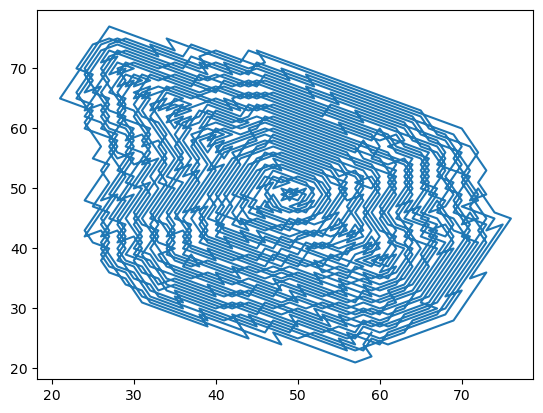

In [6]:
board = initialize_board(100)
sequence,x_coordinates,y_coordinates = simulate_walk(board);
print("last element = ", sequence[-1])

plt.plot(x_coordinates, y_coordinates)